In [1]:
import tensorflow as tf

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# get the data
filname = "D:\study\dataset.csv"
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df=pd.read_csv("D:\study\dataset.csv",names=names, na_filter=False)
im=df['pixels']
df.head(10)

,emotion,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


In [3]:
def getData(filname):
    # images are 48x48
    # N = 35887
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y


In [4]:
X, Y = getData(filname)
num_class = len(set(Y))
print(num_class)

7


In [5]:
# keras with tensorflow backend
N, D = X.shape
X = X.reshape(N, 48, 48, 1)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [7]:
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.models import model_from_json
from tensorflow.keras.layers import Conv2D

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout ,Flatten

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import *
from tensorflow.keras.layers import BatchNormalization

In [9]:
def my_model():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    # UNCOMMENT THIS TO VIEW THE ARCHITECTURE
    #model.summary()
    
    return model
model=my_model()
model.summary()

C:\Users\gajab\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 7)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,787,015 (10.63 MB)

 Trainable params: 2,785,863 (10.63 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [10]:
from tensorflow.keras import backend as K

In [11]:
import tensorflow.keras.backend as K

In [12]:
# Set the path for saving the model
path_model = 'model_filter.keras'

# Clear the current TensorFlow graph
K.clear_session()

# Create the model
model = my_model()

# Compile the model with the specified optimizer and learning rate
model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model to the training data
h = model.fit(
    x=X_train,
    y=y_train,
    batch_size=64,
    epochs=20,
    verbose=1,
    validation_data=(X_test, y_test),
    shuffle=True,
    callbacks=[
        ModelCheckpoint(filepath=path_model),
    ]
)



Epoch 1/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 352s 688ms/step - accuracy: 0.3060 - loss: 1.7859 - val_accuracy: 0.4037 - val_loss: 1.5842
Epoch 2/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 349s 691ms/step - accuracy: 0.4859 - loss: 1.3490 - val_accuracy: 0.4876 - val_loss: 1.3589
Epoch 3/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 360s 713ms/step - accuracy: 0.5701 - loss: 1.1325 - val_accuracy: 0.5578 - val_loss: 1.1458
Epoch 4/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 361s 715ms/step - accuracy: 0.6280 - loss: 1.0001 - val_accuracy: 0.5854 - val_loss: 1.0909
Epoch 5/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 365s 722ms/step - accuracy: 0.6847 - loss: 0.8626 - val_accuracy: 0.5854 - val_loss: 1.1164
Epoch 6/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 362s 718ms/step - accuracy: 0.7412 - loss: 0.7188 - val_accuracy: 0.5968 - val_loss: 1.1287
Epoch 7/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 364s 720ms/step - accuracy: 0.8119 - loss: 0.5397 - val_accuracy: 0.6208 - val_loss: 1.1532
Epoch 8/20
505/505 ━━━━━━━━━━━━━━━━━━━━ 363s 718ms/step - accuracy: 0.8647 

In [14]:
objects = ('angry','disgust','fear','happy','sad','surpeise','neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


In [15]:
def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
plt.show()

In [16]:
y_pred=model.predict(X_test)
#print(y_pred)
y_test.shape

113/113 ━━━━━━━━━━━━━━━━━━━━ 12s 101ms/step


(3589, 7)

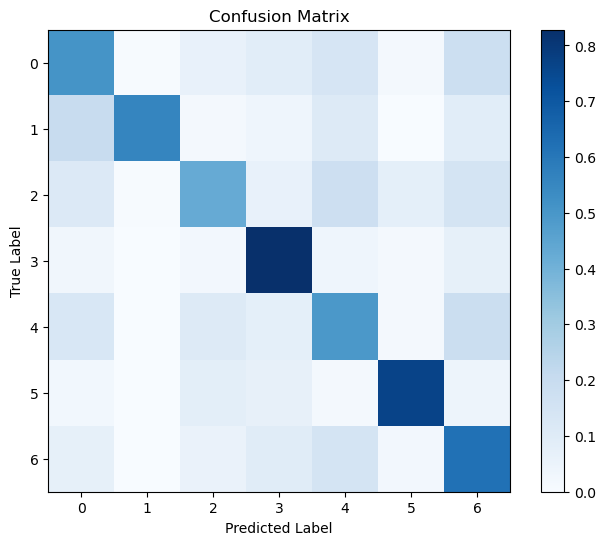

In [18]:
# Assuming you have already trained a neural network model and obtained predictions (y_pred) on the test data (X_test, y_test)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_pred contains the predicted labels (one-hot encoded) for each sample
# Convert y_pred to class labels (0 to 6)
y_pred_labels = np.argmax(y_pred, axis=1)

# Assuming y_test contains the true labels (one-hot encoded) for each sample
# Convert y_test to class labels (0 to 6)
y_true_labels = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a DataFrame for visualization
df_cm = pd.DataFrame(cm, index=[str(i) for i in range(7)], columns=[str(i) for i in range(7)])

# Display the confusion matrix
plt.figure(figsize=(8, 6))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.imshow(df_cm, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.show()


**Real Time Expression Prediction**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


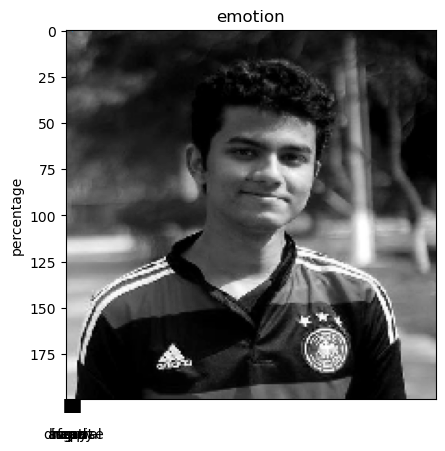

Expression Prediction: happy


In [19]:
from skimage import io
img = image.load_img("D:\study\Shawon.jpg", color_mode='grayscale', target_size=(48, 48))
show_img=image.load_img("D:\study\Shawon.jpg", color_mode='grayscale', target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])
        

In [20]:
from keras.preprocessing import image

img = image.load_img("D:\study\Shawon.jpg", color_mode='grayscale', target_size=(48, 48))
show_img = image.load_img("D:\study\Shawon.jpg", color_mode='rgb', target_size=(200, 200))
x = image.img_to_array(img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


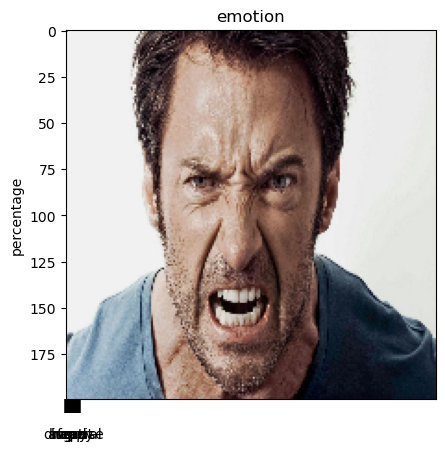

Expression Prediction: angry


In [21]:
from skimage import io
img = image.load_img("D:\study\wallpaper2you_443897.jpg", color_mode='grayscale', target_size=(48, 48))
show_img=image.load_img("D:\study\wallpaper2you_443897.jpg", target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])